In [1]:
from google.colab import drive
drive.mount('content/')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import normaltest
import plotly.express as px
import plotly.graph_objects as go

Mounted at content/


In [2]:
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Con esto chequeamos que los 167 valores de la columna de países no están repetidos.
len(df['country'].unique()) == len(df)

True

In [6]:
col_num = list(df.columns)
col_num.remove('country')
col_num

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [7]:
# Para saber si los datos de una columna están normalmente distribuidos.
def is_normal(data):
  stat, p = normaltest(data)
  if p < 0.05:
    return False
  else:
    return True

In [8]:
for i in col_num:
  print(is_normal(df[i]))

False
False
False
False
False
False
False
False
False


In [9]:
mms = MinMaxScaler()
df_scaled = df.copy()
df_scaled[col_num] = mms.fit_transform(df[col_num])
X = df_scaled[col_num]

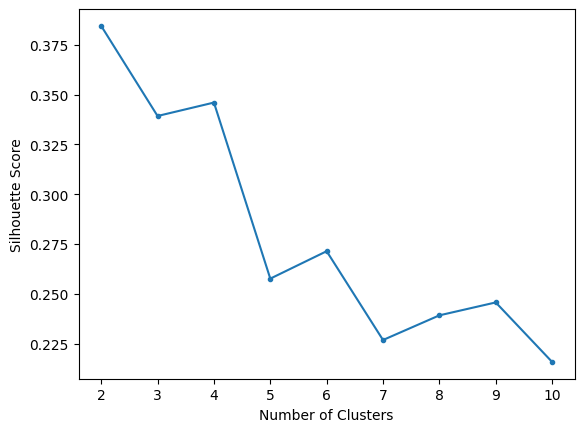

In [10]:
silhouette_scores_list = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  silhouette_scores_list.append(silhouette_score(X, kmeans.labels_))

# Visualize scores
plt.plot(range(2, 11), silhouette_scores_list, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

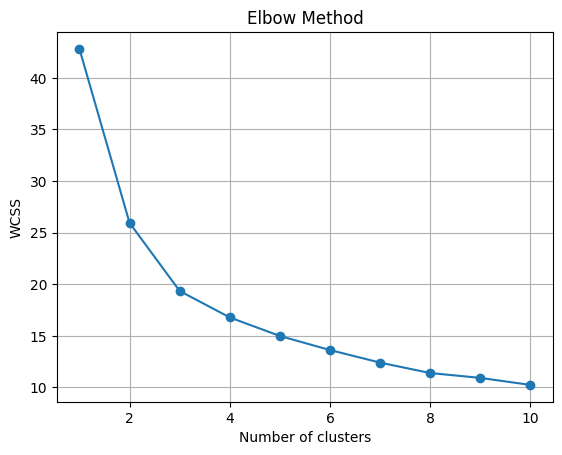

In [11]:
wcss = []
for i in range(1, 11):  # Probamos de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia es el WCSS

# Graficar los resultados
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.labels_

print('kmeans inertia:',kmeans.inertia_)
print('kmeans pred:',y_kmeans)

kmeans inertia: 16.784452803644943
kmeans pred: [2 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 2 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 3 0 2 2 0 0 2 3 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 3 0 1 2 0 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [13]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=np.array(X['child_mort']),
    y=np.array(X['exports']),
    z=np.array(X['income']),
    color=y_kmeans,
    labels={'x': 'Mortalidad Infantil', 'y': 'Exportaciones', 'z': 'Ingresos'}
)

# Calcular los centroides
centroids = kmeans.cluster_centers_

# Agregar los centroides al gráfico
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 4],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Centroides'
    )
)

# Mover la leyenda a la izquierda
fig.update_layout(
    legend=dict(
        x=0,  # Alineación horizontal, 0 es el extremo izquierdo
        y=1,  # Alineación vertical, 1 es el extremo superior
        xanchor='left',  # Anclar desde el lado izquierdo
        yanchor='top'  # Anclar desde el lado superior
    )
)

# Show the plot
fig.show()


In [15]:
df_classified = df.copy()
df_classified['Class'] = y_kmeans

df_classified['Class'].loc[df_classified['Class'] == 1] = 'Ayuda Urgente'
df_classified['Class'].loc[df_classified['Class'] == 0] = 'Ayuda No Urgente'
df_classified['Class'].loc[df_classified['Class'] == 3] = 'Máximos Exportadores Per Cápita'
df_classified['Class'].loc[df_classified['Class'] == 2] = 'No Necesitan Ayuda'

fig = px.choropleth(df_classified[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Necesidad de Ayuda en los Países',
                    color = df_classified['Class'],
                    color_discrete_map = {'Ayuda Urgente':'Red',
                                        'No Necesitan Ayuda':'Green',
                                        'Ayuda No Urgente':'Yellow',
                                        'Máximos Exportadores Per Cápita':'Blue'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Leyenda',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show()